In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_01.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description     report_date_time  \
occurred_date_time                                                     
2003-01-01 00:00:00              IDENTITY THEFT  2005-02-14 17:30:00   
2003-01-01 00:08:00         ASSAULT WITH INJURY  2003-01-01 00:08:00   
2003-01-01 00:11:00  POSS OF DRUG PARAPHERNALIA  2003-01-01 00:11:00   
2003-01-01 00:11:00         PUBLIC INTOXICATION  2003-01-01 00:11:00   
2003-01-01 00:15:00         PUBLIC INTOXICATION  2003-01-01 00:43:00   

                                    location_type  \
occurred_date_time                                  
2003-01-01 00:00:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01 00:08:00              BAR / NIGHT CLUB   
2003-01-01 00:11:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 00:11:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 00:15:00  STREETS / HWY / ROAD / ALLEY   

                                          address  council_district  \
occurred_date_time                                                    
2003-01-01 00:00:00                  715 E 8TH ST               9.0   
2003-01-01 00:08:00               404 COLORADO ST               9.0   
2003-01-01 00:11:00  700 BLOCK E 6TH OLD PECAN ST               NaN   
2003-01-01 00:11:00    500 BLOCK SAN JACINTO BLVD               9.0   
2003-01-01 00:15:00                  219 W 6TH ST               9.0   

                    apd_sector  apd_district clearance_status  \
occurred_date_time                                              
2003-01-01 00:00:00         GE           2.0              NaN   
2003-01-01 00:08:00         GE           1.0                N   
2003-01-01 00:11:00         GE           3.0                N   
2003-01-01 00:11:00         GE           2.0                C   
2003-01-01 00:15:00         GE           1.0                C   

                          clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                            
2003-01-01 00:00:00                  NaN  30.267553 -97.734674  2003      1   
2003-01-01 00:08:00                  NaN  30.267019 -97.744958  2003      1   
2003-01-01 00:11:00  2003-01-06 00:00:00  30.266133 -97.735961  2003      1   
2003-01-01 00:11:00                  NaN  30.266850 -97.740964  2003      1   
2003-01-01 00:15:00  2003-01-01 00:00:00  30.268594 -97.745042  2003      1   

                     week  day  hour  
occurred_date_time                    
2003-01-01 00:00:00     1    1     0  
2003-01-01 00:08:00     1    1     0  
2003-01-01 00:11:00     1    1     0  
2003-01-01 00:11:00     1    1     0  
2003-01-01 00:15:00     1    1     0

highest_offense_description     report_date_time  \
occurred_date_time                                                       
2020-12-05 00:06:00  POSS CONTROLLED SUB/NARCOTIC  2020-12-05 00:06:00   
2020-12-05 01:30:00                POCKET PICKING  2020-12-05 12:31:00   
2020-12-05 02:15:00           ASSAULT WITH INJURY  2020-12-05 18:06:00   
2020-12-05 02:18:00            DATING DISTURBANCE  2020-12-05 02:18:00   
2020-12-05 02:21:00       POSSESSION OF MARIJUANA  2020-12-05 04:12:00   

                                    location_type                address  \
occurred_date_time                                                         
2020-12-05 00:06:00  STREETS / HWY / ROAD / ALLEY  E 5TH ST / TRINITY ST   
2020-12-05 01:30:00  STREETS / HWY / ROAD / ALLEY           400 E 6TH ST   
2020-12-05 02:15:00  STREETS / HWY / ROAD / ALLEY           715 W 6TH ST   
2020-12-05 02:18:00  STREETS / HWY / ROAD / ALLEY  E 6TH ST / TRINITY ST   
2020-12-05 02:21:00  STREETS / HWY / ROAD / ALLEY           400 E 6TH ST   

                     council_district apd_sector  apd_district  \
occurred_date_time                                               
2020-12-05 00:06:00               9.0         GE           2.0   
2020-12-05 01:30:00               9.0         GE           2.0   
2020-12-05 02:15:00               9.0         GE           1.0   
2020-12-05 02:18:00               9.0         GE           2.0   
2020-12-05 02:21:00               9.0         GE           2.0   

                    clearance_status       clearance_date   latitude  \
occurred_date_time                                                     
2020-12-05 00:06:00                C  2020-12-05 00:00:00  30.266131   
2020-12-05 01:30:00              NaN                  NaN  30.267351   
2020-12-05 02:15:00              NaN                  NaN  30.269888   
2020-12-05 02:18:00              NaN                  NaN  30.267068   
2020-12-05 02:21:00                C  2020-12-05 00:00:00  30.267351   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2020-12-05 00:06:00 -97.739684  2020     12    49    5     0  
2020-12-05 01:30:00 -97.739093  2020     12    49    5     1  
2020-12-05 02:15:00 -97.750286  2020     12    49    5     2  
2020-12-05 02:18:00 -97.739342  2020     12    49    5     2  
2020-12-05 02:21:00 -97.739093  2020     12    49    5     2

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

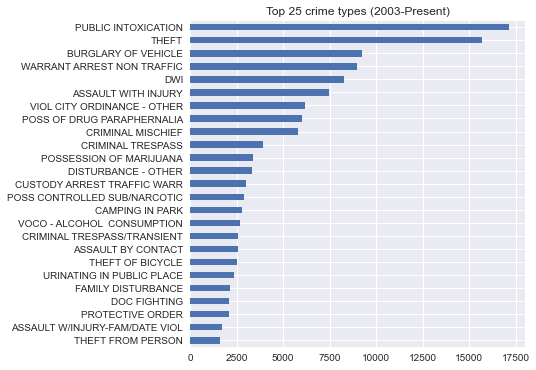

----------------------------------------------------------
----------------------------------------------------------


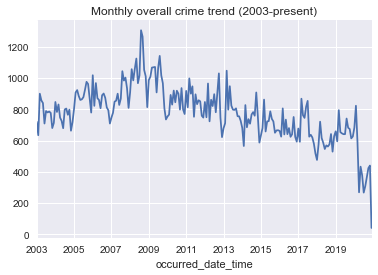

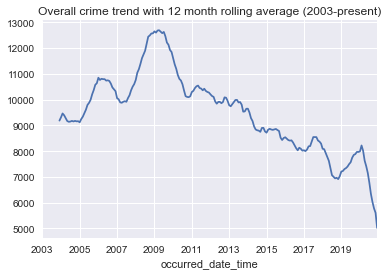

----------------------------------------------------------
----------------------------------------------------------


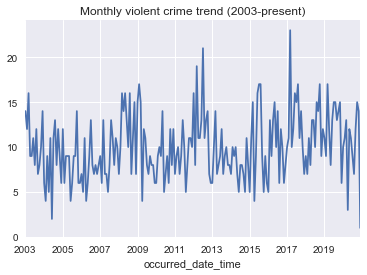

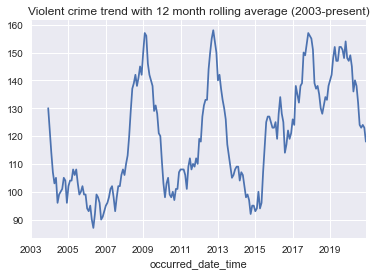

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

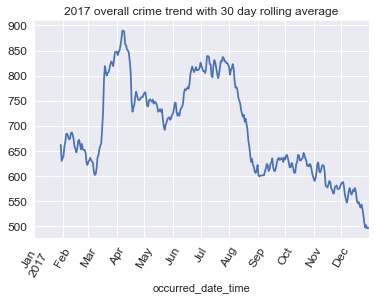

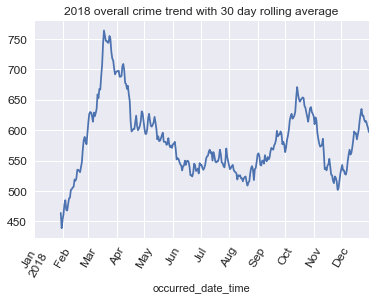

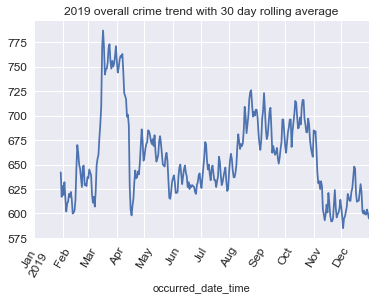

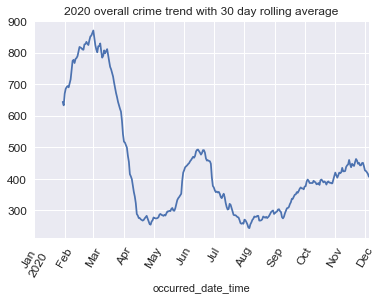

In [6]:
df_17.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

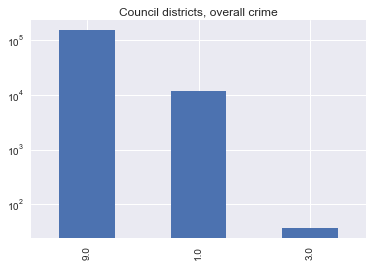

----------------------------------------------------------


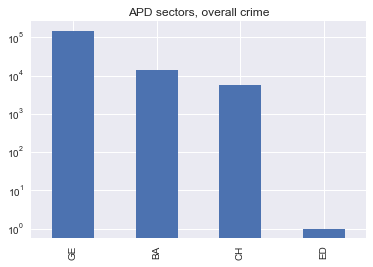

----------------------------------------------------------


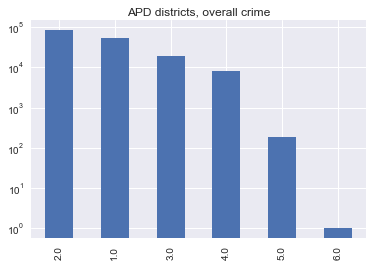

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

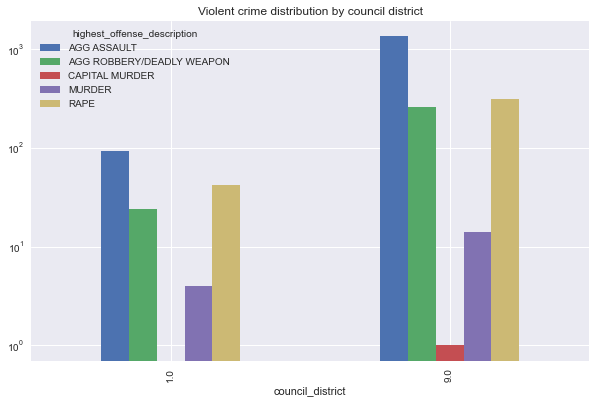

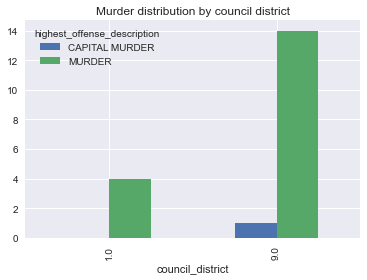

----------------------------------------------------------
----------------------------------------------------------


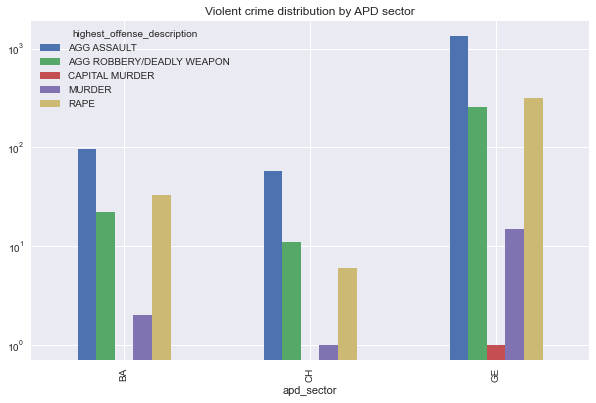

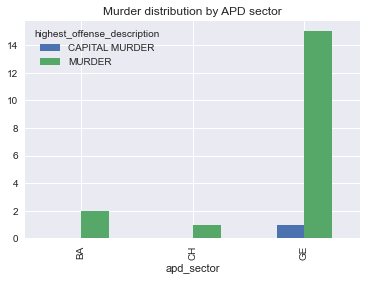

----------------------------------------------------------
----------------------------------------------------------


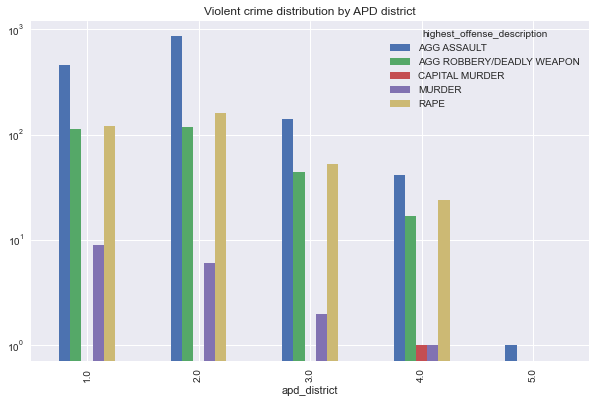

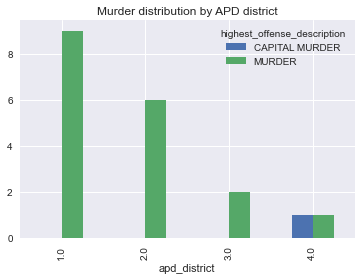

In [8]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             3   
AMUSEMENT PARK                                            0   
BANKS / SAVINGS & LOAN                                    1   
BAR / NIGHT CLUB                                        235   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      6   
COMMERCIAL / OFFICE BUILDING                             17   
COMMUNITY CENTER                                          2   
CONSTRUCTION SITE                                         4   
CONVENIENCE STORE                                        12   
DRUG STORE / DR. OFFICE / HOSPITAL                       10   
FIELD / WOODS                                             6   
GAS / SERVICE STATIONS                                   13   
GOVERNMENT / PUBLIC BUILDING                             30   
HOTEL / MOTEL / ETC.                                     14   
LAKE / WATERWAY                                           1   
OTHER / UNKNOWN                                          32   
PARK / PLAYGROUND                                        17   
PARKING LOTS / GARAGE                                   118   
RESIDENCE / HOME                                         39   
RESTAURANTS                                              18   
SCHOOLS / COLLEGES                                        1   
SHELTER-MISSION / HOMELESS                               14   
STREETS / HWY / ROAD / ALLEY                            889   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)           10   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           2   
AMUSEMENT PARK                                                          1   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        5   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    1   
COMMERCIAL / OFFICE BUILDING                                            7   
COMMUNITY CENTER                                                        0   
CONSTRUCTION SITE                                                       1   
CONVENIENCE STORE                                                       7   
DRUG STORE / DR. OFFICE / HOSPITAL                                      1   
FIELD / WOODS                                                           2   
GAS / SERVICE STATIONS                                                  2   
GOVERNMENT / PUBLIC BUILDING                                            3   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
OTHER / UNKNOWN                                                         5   
PARK / PLAYGROUND                                                       7   
PARKING LOTS / GARAGE                                                  44   
RESIDENCE / HOME                                                        4   
RESTAURANTS                                                             1   
SCHOOLS / COLLEGES                                                      0   
SHELTER-MISSION / HOMELESS                                              0   
STREETS / HWY / ROAD / ALLEY                                          193   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       1     1  
AMUSEMENT PARK                                               0       0     0  
BANKS / SAVINGS & LOAN                    

----------------------------------------------------------
----------------------------------------------------------


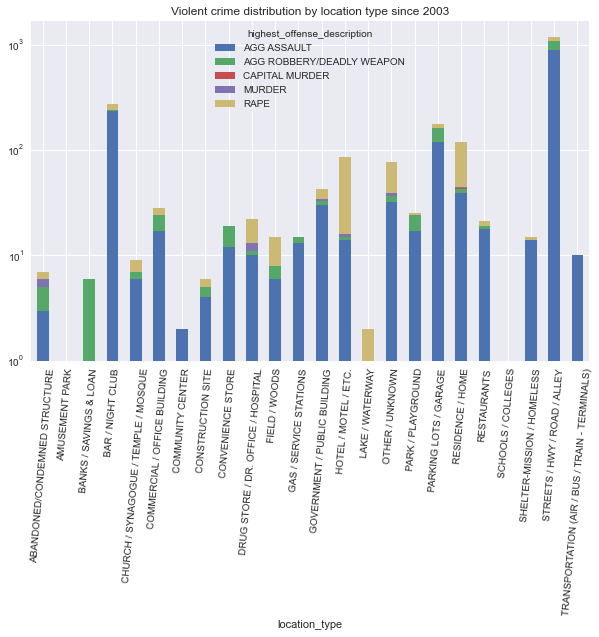

----------------------------------------------------------
----------------------------------------------------------


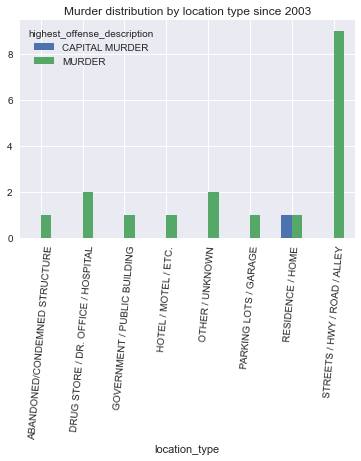

In [9]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(10, 6.25),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


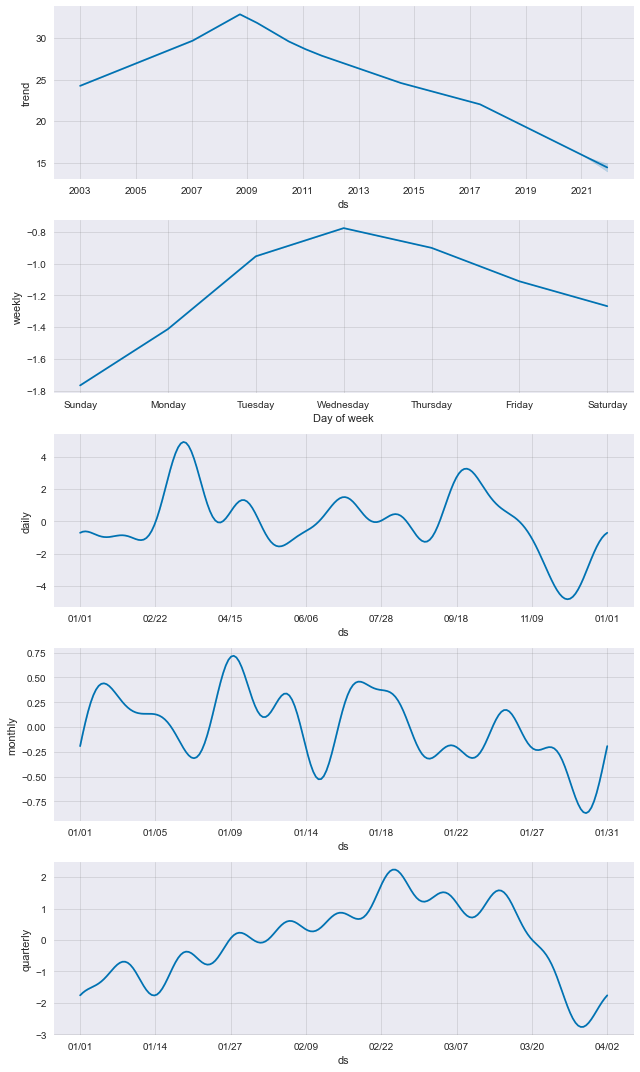

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


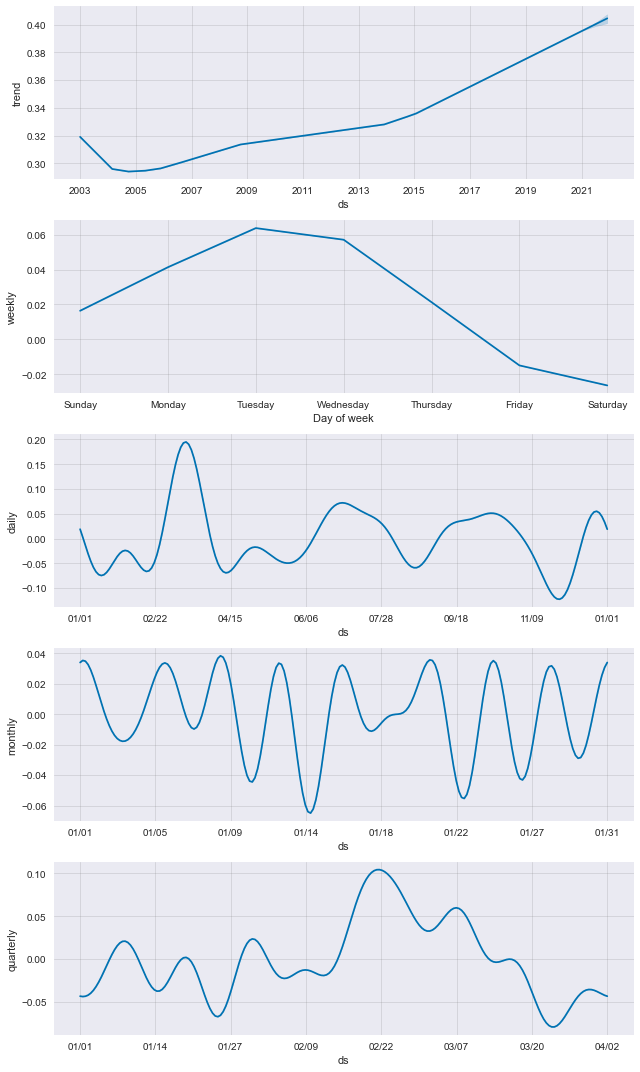

In [11]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1